### 1. Prediction

In [2]:
from datascience import *
import matplotlib
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [3]:
original = Table.read_table(path_data + 'family_heights.csv')
heights = Table().with_columns('MidParent', original.column('midparentHeight'),'Child', original.column('childHeight'))
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


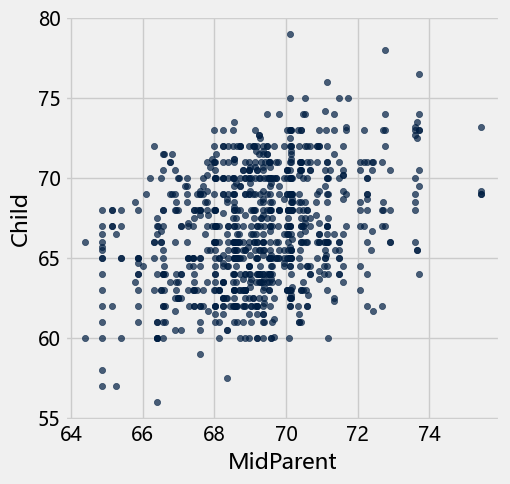

In [4]:
heights.scatter('MidParent')

In [5]:
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()

In [6]:
heights_with_predictions = heights.with_column('Prediction', heights.apply(predict_child, 'MidParent'))

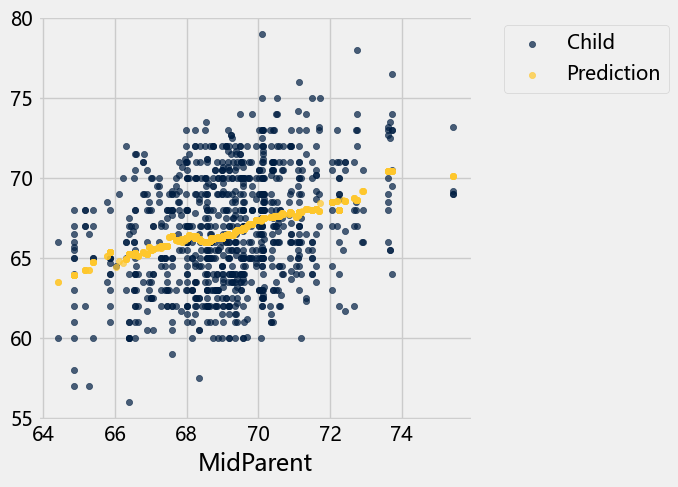

In [7]:
heights_with_predictions.scatter('MidParent')

### 2. Correlation

In [8]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np
from scipy import stats

In [9]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

In [10]:
hybrid = Table.read_table(path_data + 'hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


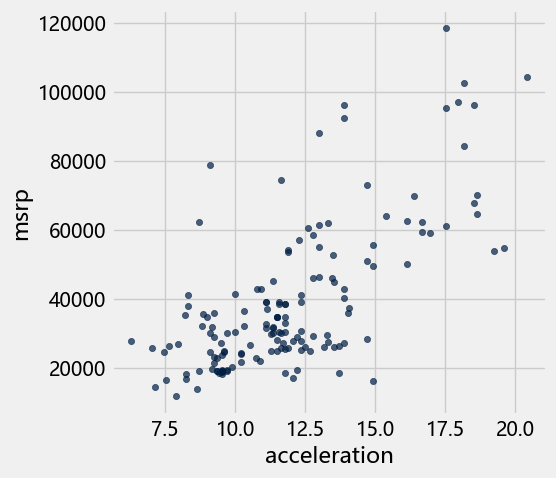

In [11]:
hybrid.scatter('acceleration', 'msrp')

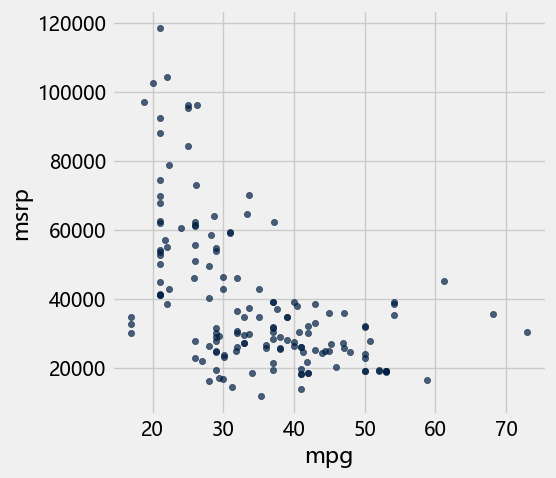

In [12]:
hybrid.scatter('mpg', 'msrp')

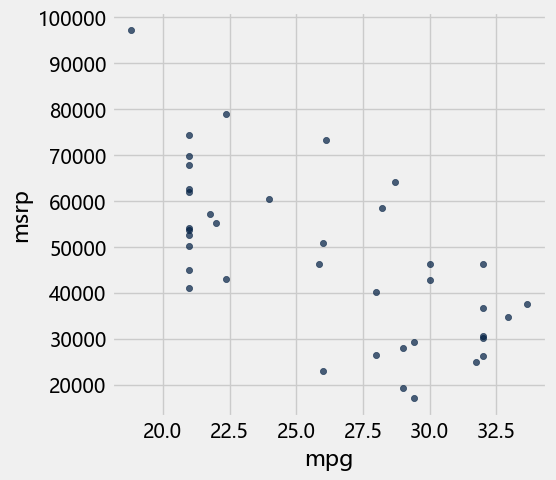

In [13]:
suv = hybrid.where('class', 'SUV')
suv.scatter('mpg', 'msrp')

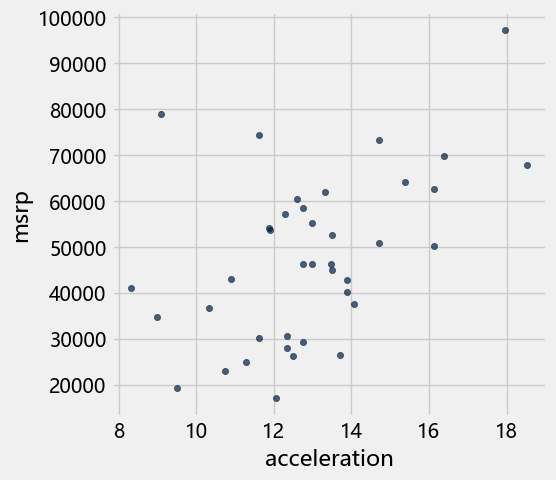

In [14]:
suv.scatter('acceleration', 'msrp')

In [15]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

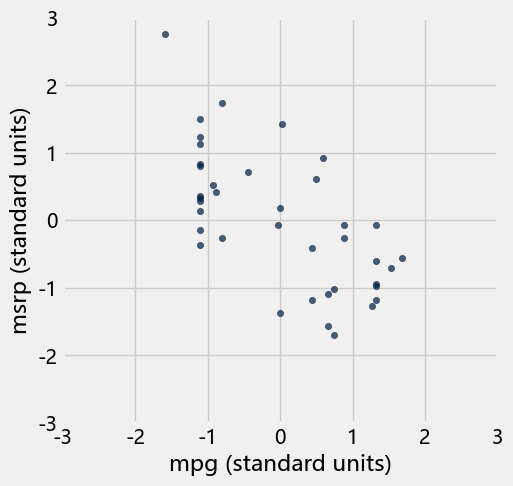

In [16]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

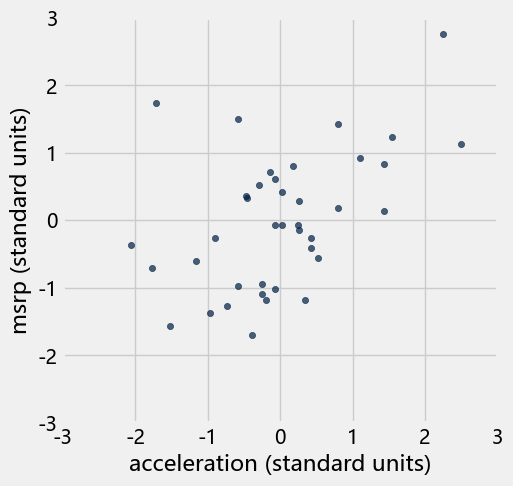

In [17]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

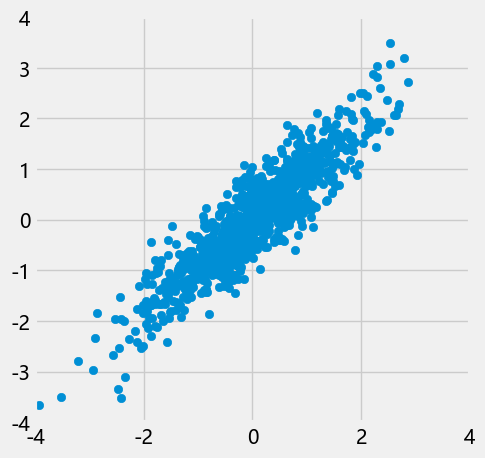

In [18]:
r_scatter(0.9)

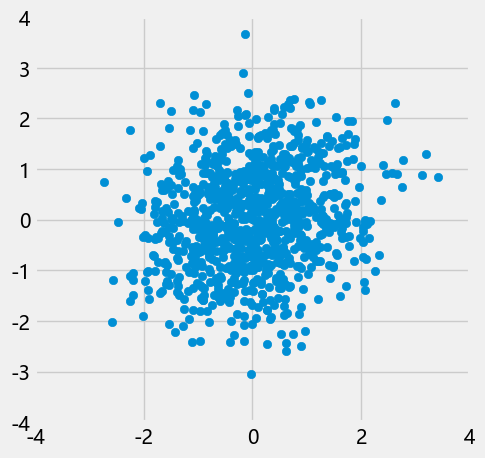

In [19]:
r_scatter(0.25)

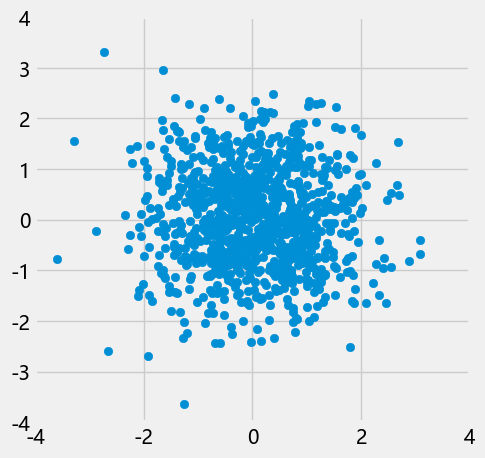

In [20]:
r_scatter(0)

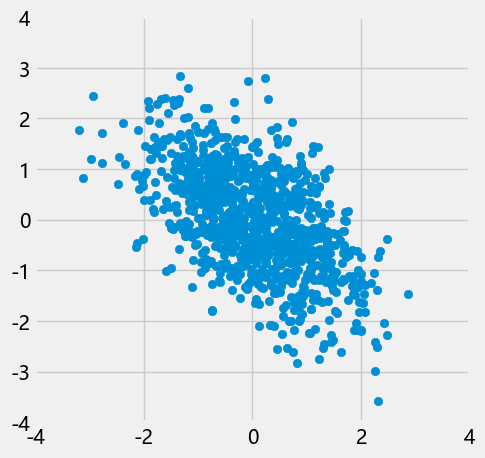

In [21]:
r_scatter(-0.55)

In [22]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


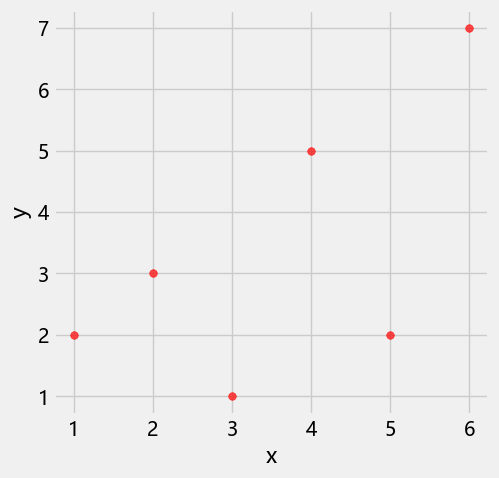

In [23]:
t.scatter(0, 1, s=30, color='red')

In [24]:
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t_su

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [25]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [26]:
r = np.mean(t_product.column(4))
r

0.61741639718977093

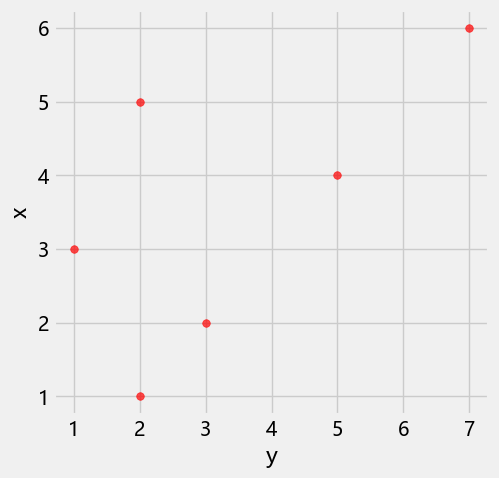

In [27]:
t.scatter('y', 'x', s=30, color='red')

In [28]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

In [29]:
correlation(t, 'x', 'y')

0.61741639718977093

In [30]:
correlation(t, 'y', 'x')

0.61741639718977093

In [31]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [32]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

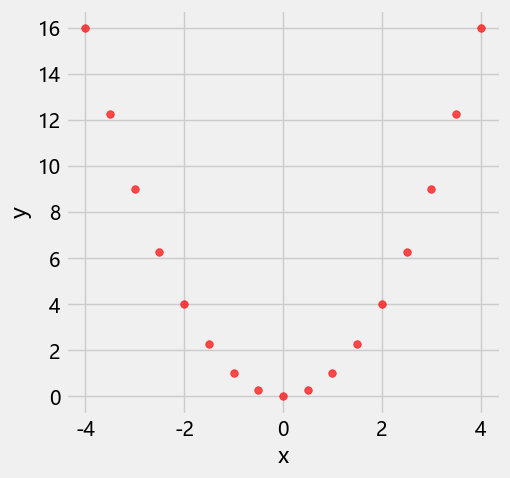

In [33]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [34]:
correlation(nonlinear, 'x', 'y')

0.0

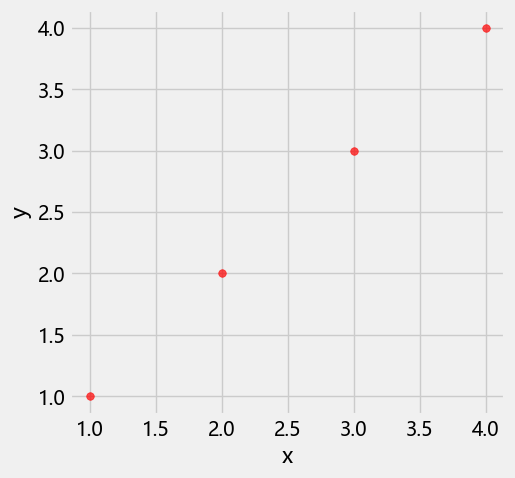

In [35]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [36]:
correlation(line, 'x', 'y')

1.0

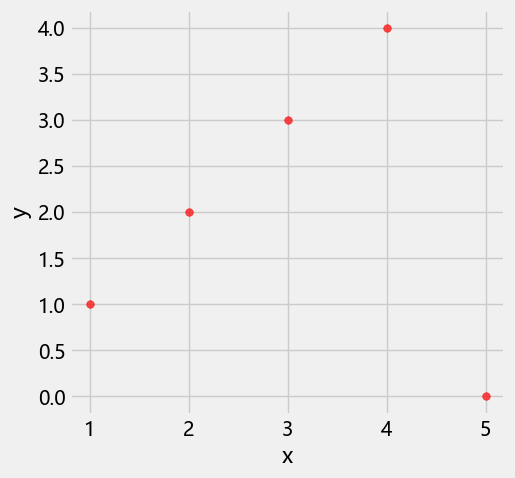

In [37]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [38]:
correlation(outlier, 'x', 'y')

0.0

In [39]:
sat2014 = Table.read_table(path_data + 'sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


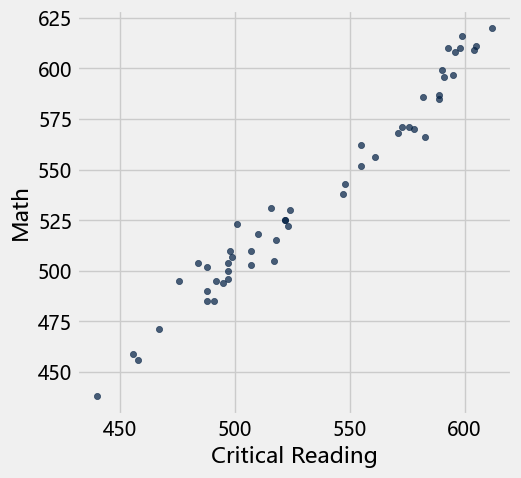

In [40]:
sat2014.scatter('Critical Reading', 'Math')

In [41]:
correlation(sat2014, 'Critical Reading', 'Math')

0.98475584110674341

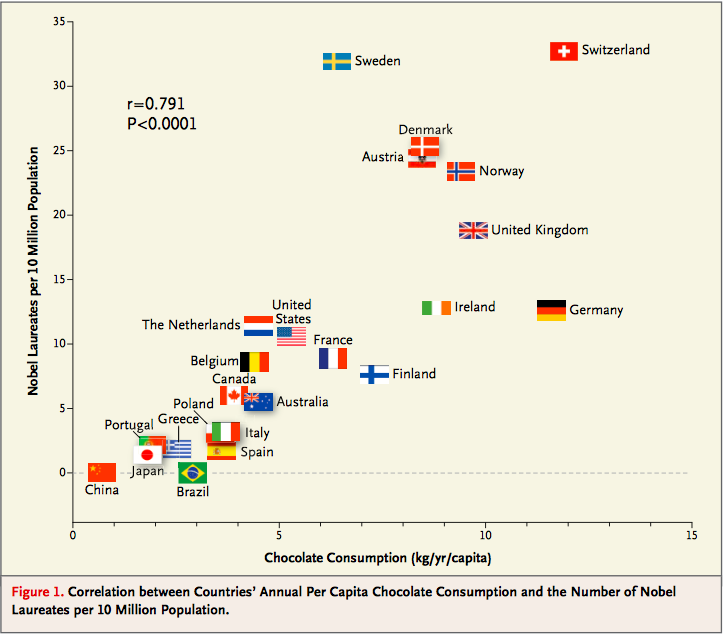

In [45]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/images/chocoNobel.png")

### 3. Regression Line

In [1]:
from datascience import *
import numpy as np
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
original = Table.read_table(path_data + 'family_heights.csv')

heights = Table().with_columns(
    'MidParent', original.column('midparentHeight'),
    'Child', original.column('childHeight')
    )

In [3]:
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()  

In [4]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

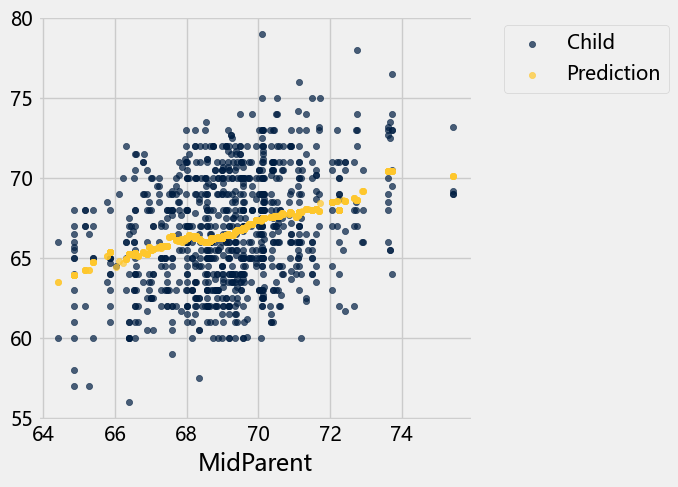

In [5]:
heights_with_predictions.scatter('MidParent')

In [6]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

In [7]:
heights_SU = Table().with_columns(
    'MidParent SU', standard_units(heights.column('MidParent')),
    'Child SU', standard_units(heights.column('Child'))
)
heights_SU

MidParent SU,Child SU
3.45465,1.80416
3.45465,0.686005
3.45465,0.630097
3.45465,0.630097
2.47209,1.88802
2.47209,1.60848
2.47209,-0.348285
2.47209,-0.348285
1.58389,1.18917
1.58389,0.350559


In [8]:
sd_midparent = np.std(heights.column(0))
sd_midparent

1.8014050969207571

In [9]:
0.5/sd_midparent

0.27756111096536701

In [10]:
def predict_child_su(mpht_su):
    """Return a prediction of the height (in standard units) of a child 
    whose parents have a midparent height of mpht_su in standard units.
    """
    close = 0.5/sd_midparent
    close_points = heights_SU.where('MidParent SU', are.between(mpht_su-close, mpht_su + close))
    return close_points.column('Child SU').mean()   

In [11]:
heights_with_su_predictions = heights_SU.with_column(
    'Prediction SU', heights_SU.apply(predict_child_su, 'MidParent SU')
    )

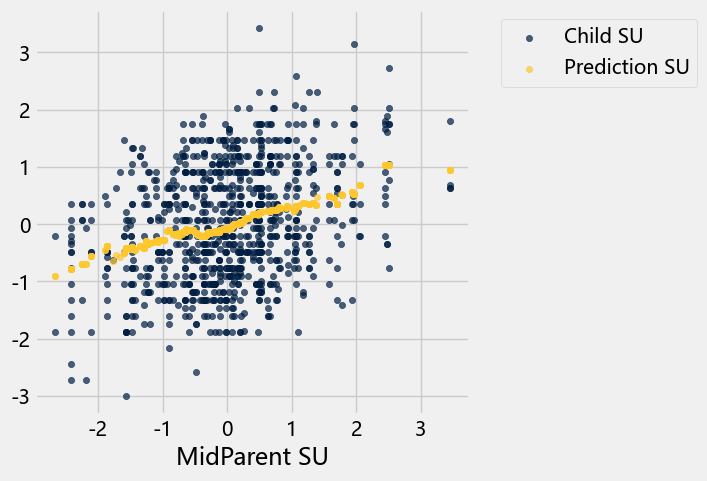

In [12]:
heights_with_su_predictions.scatter('MidParent SU')

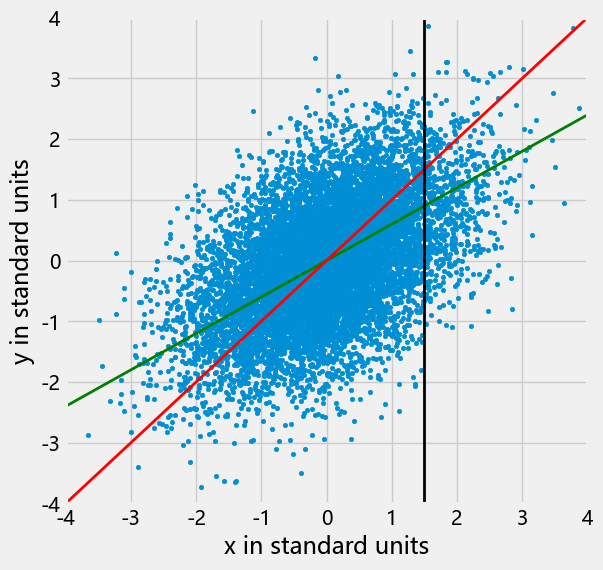

In [15]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plots.figure(figsize=(6,6))
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.scatter(x_demo, y_demo, s=10)
plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plots.plot([-4,4],[-4,4], color='r', lw=2)
plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
plots.xlabel('x in standard units')
plots.ylabel('y in standard units');

In [16]:
def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(6, 6))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x, y)
    plots.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plots.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plots.plot([-4,4], [4,-4], lw=2, color='r')

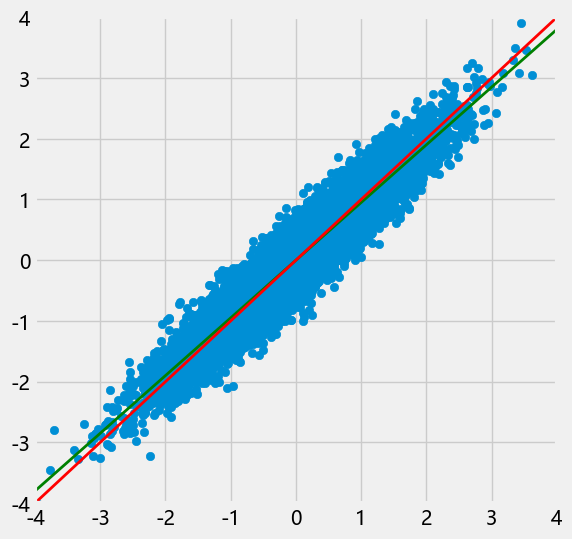

In [17]:
regression_line(0.95)

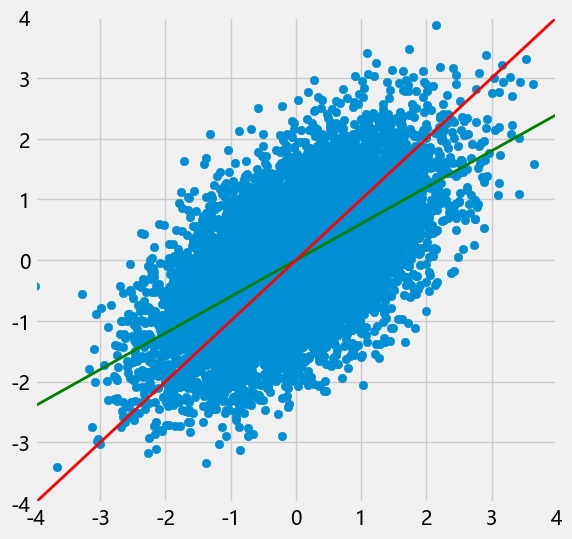

In [18]:
regression_line(0.6)

In [19]:
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

In [20]:
family_r = correlation(heights, 'MidParent', 'Child')
family_r

0.32094989606395924

In [21]:
family_slope = slope(heights, 'MidParent', 'Child')
family_intercept = intercept(heights, 'MidParent', 'Child')
family_slope, family_intercept

(0.63736089696947895, 22.636240549589751)

In [22]:
family_slope * 70.48 + family_intercept

67.557436567998622

In [23]:
heights_with_predictions.where('MidParent', are.equal_to(70.48)).show(3)

MidParent,Child,Prediction
70.48,74,67.6342
70.48,70,67.6342
70.48,68,67.6342


In [24]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', family_slope * heights.column('MidParent') + family_intercept
)
heights_with_predictions

MidParent,Child,Prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


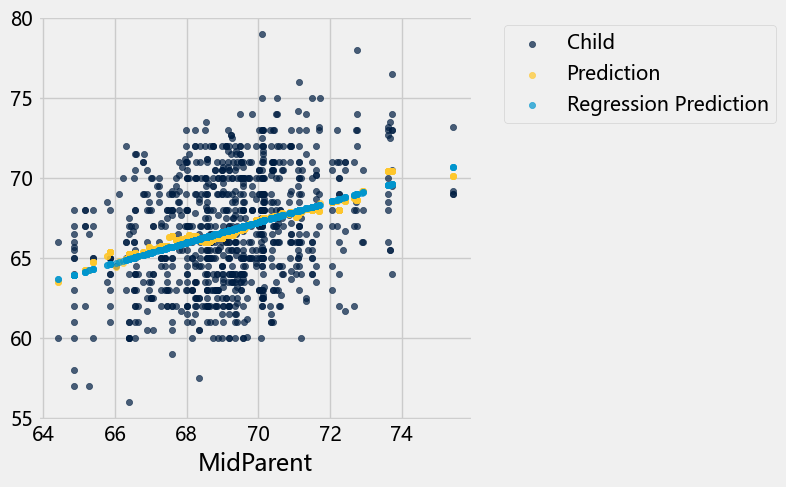

In [25]:
heights_with_predictions.scatter('MidParent')

In [26]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

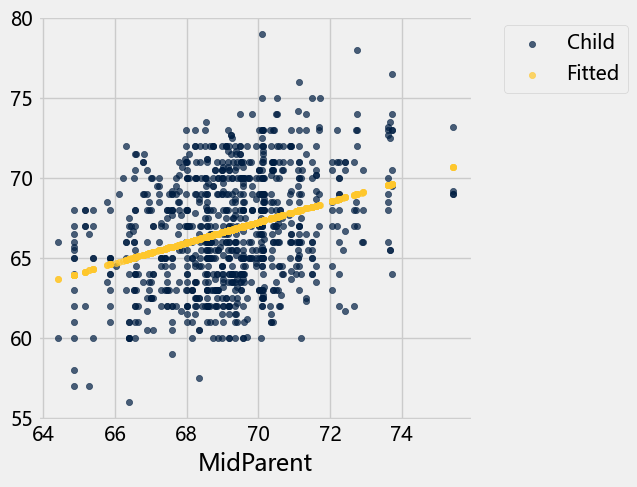

In [27]:
heights.with_column('Fitted', fit(heights, 'MidParent', 'Child')).scatter('MidParent')

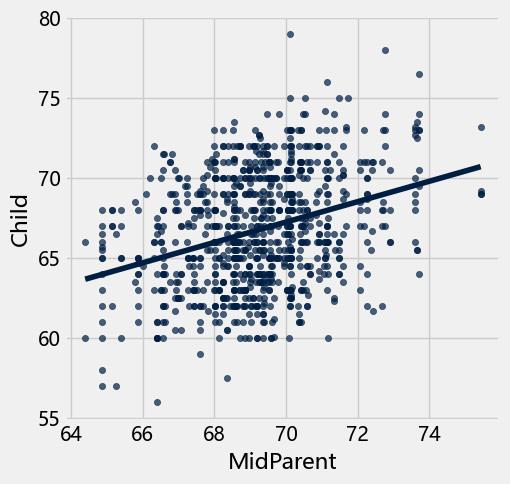

In [28]:
heights.scatter('MidParent', fit_line=True)

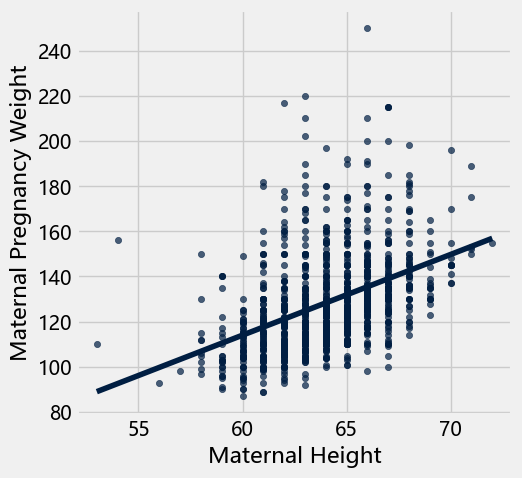

In [29]:
baby = Table.read_table(path_data + 'baby.csv')
baby.scatter('Maternal Height', 'Maternal Pregnancy Weight', fit_line=True)

In [30]:
slope(baby, 'Maternal Height', 'Maternal Pregnancy Weight')

3.5728462592750558

### 4. Method of the Least Squares

In [31]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [32]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [33]:
little_women = Table.read_table(path_data + 'little_women.csv')
little_women = little_women.move_to_start('Periods')
little_women.show(3)

Periods,Characters
189,21759
188,22148
231,20558


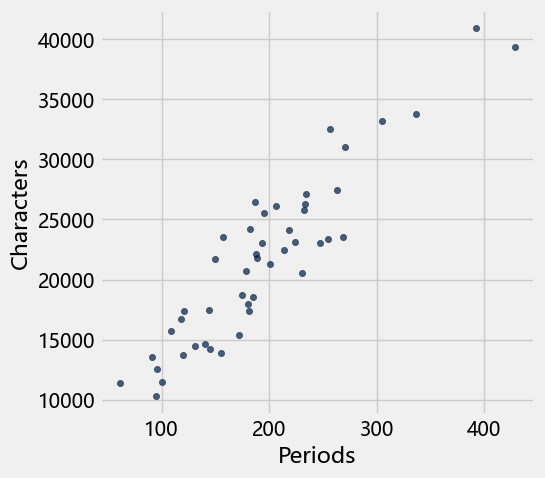

In [34]:
little_women.scatter('Periods', 'Characters')

In [35]:
correlation(little_women, 'Periods', 'Characters')

0.92295768958548163

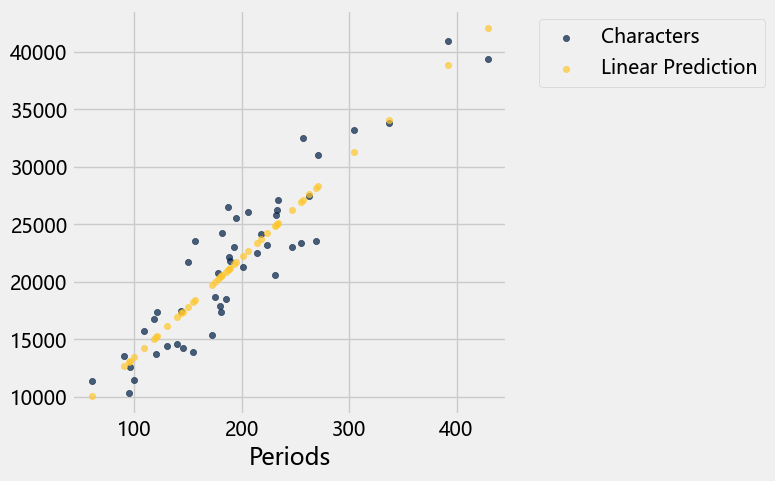

In [36]:
lw_with_predictions = little_women.with_column('Linear Prediction', fit(little_women, 'Periods', 'Characters'))
lw_with_predictions.scatter('Periods')

In [37]:
actual = lw_with_predictions.column('Characters')
predicted = lw_with_predictions.column('Linear Prediction')
errors = actual - predicted

In [38]:
lw_with_predictions.with_column('Error', errors)

Periods,Characters,Linear Prediction,Error
189,21759,21183.6,575.403
188,22148,21096.6,1051.38
231,20558,24836.7,-4278.67
195,25526,21705.5,3820.54
255,23395,26924.1,-3529.13
140,14622,16921.7,-2299.68
131,14431,16138.9,-1707.88
214,22476,23358,-882.043
337,33767,34056.3,-289.317
185,18508,20835.7,-2327.69


In [39]:
lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods', 'Characters')

In [40]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope of Regression Line:     87.0 characters per period
Intercept of Regression Line: 4745.0 characters


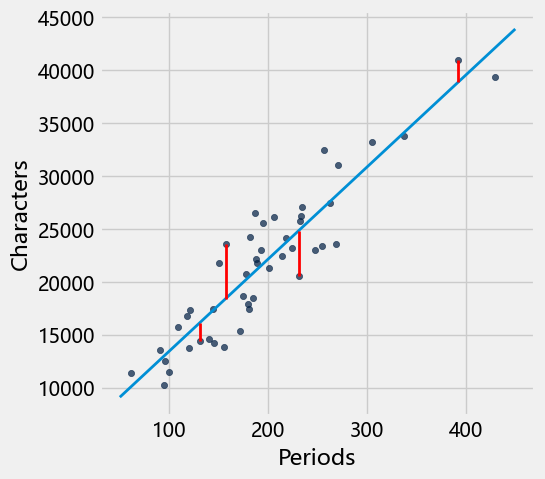

In [41]:
print('Slope of Regression Line:    ', np.round(lw_reg_slope), 'characters per period')
print('Intercept of Regression Line:', np.round(lw_reg_intercept), 'characters')
lw_errors(lw_reg_slope, lw_reg_intercept)

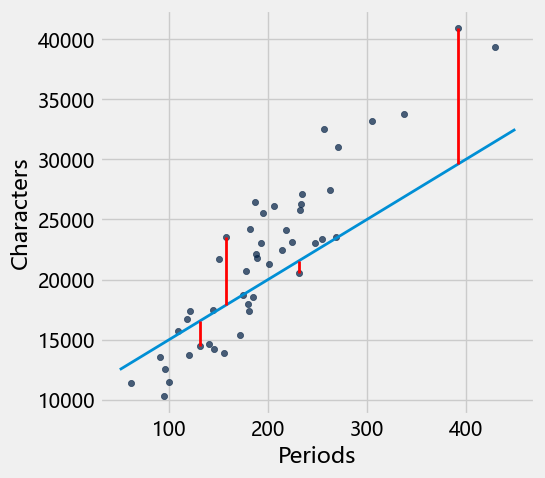

In [42]:
lw_errors(50, 10000)

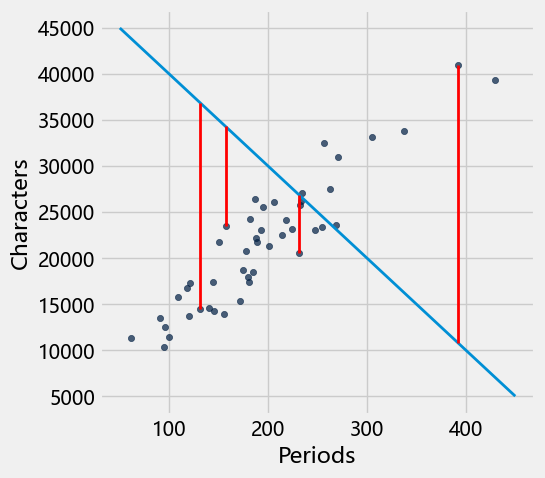

In [43]:
lw_errors(-100, 50000)

In [44]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = slope * x + intercept
    mse = np.mean((y - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Root mean squared error: 4322.16783177


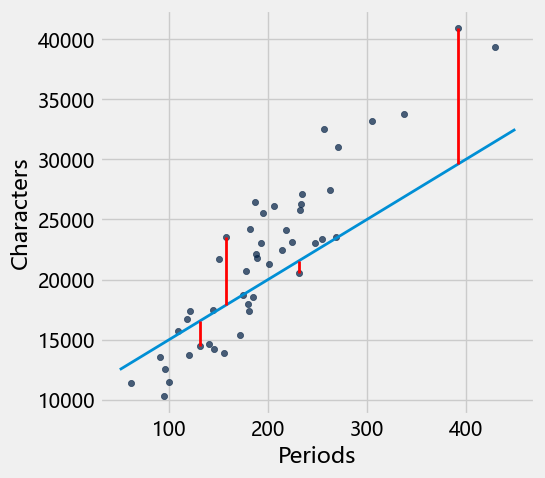

In [45]:
lw_rmse(50, 10000)

Root mean squared error: 16710.1198374


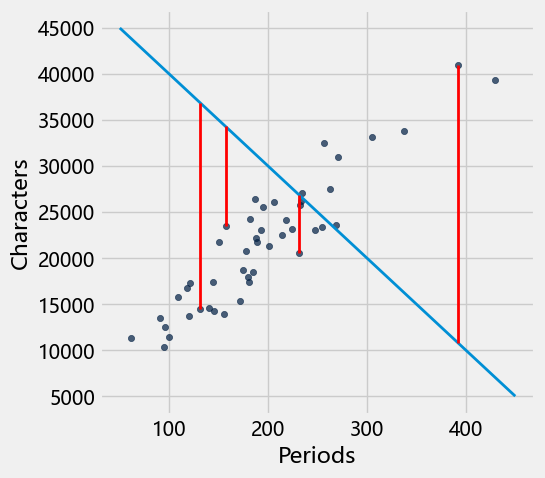

In [46]:
lw_rmse(-100, 50000)

Root mean squared error: 2715.53910638


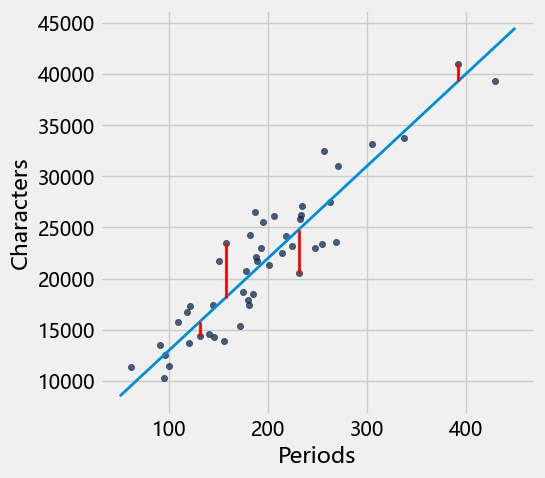

In [47]:
lw_rmse(90, 4000)

Root mean squared error: 2701.69078531


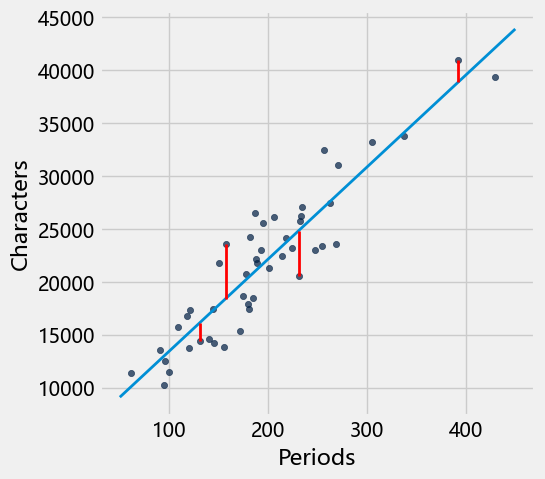

In [48]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

In [49]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [50]:
lw_mse(lw_reg_slope, lw_reg_intercept)**0.5

2701.690785311856

In [51]:
lw_mse(-100, 50000)**0.5

16710.119837353752

In [52]:
lw_mse(90, 4000)**0.5

2715.5391063834586

In [53]:
best = minimize(lw_mse)
best

array([   86.97784117,  4744.78484535])

In [54]:
print("slope from formula:        ", lw_reg_slope)
print("slope from minimize:       ", best.item(0))
print("intercept from formula:    ", lw_reg_intercept)
print("intercept from minimize:   ", best.item(1))

slope from formula:         86.9778412583
slope from minimize:        86.97784116615884
intercept from formula:     4744.78479657
intercept from minimize:    4744.784845352655


### 5. Least Squares Regression

In [55]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [56]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [57]:
shotput = Table.read_table(path_data + 'shotput.csv')
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8


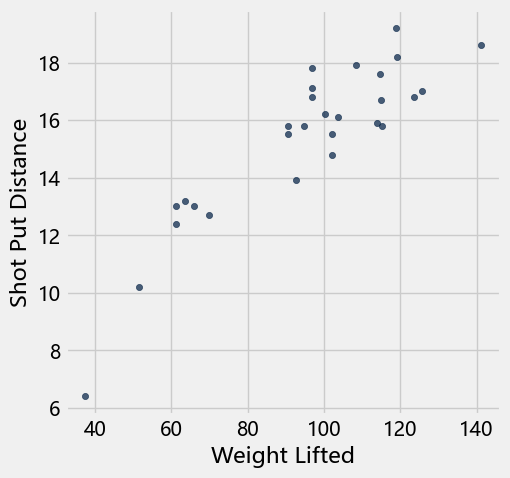

In [58]:
shotput.scatter('Weight Lifted')

In [59]:
slope(shotput, 'Weight Lifted', 'Shot Put Distance')

0.098343821597819972

In [60]:
intercept(shotput, 'Weight Lifted', 'Shot Put Distance')

5.9596290983739522

In [61]:
def shotput_linear_mse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [62]:
minimize(shotput_linear_mse)

array([ 0.09834382,  5.95962911])

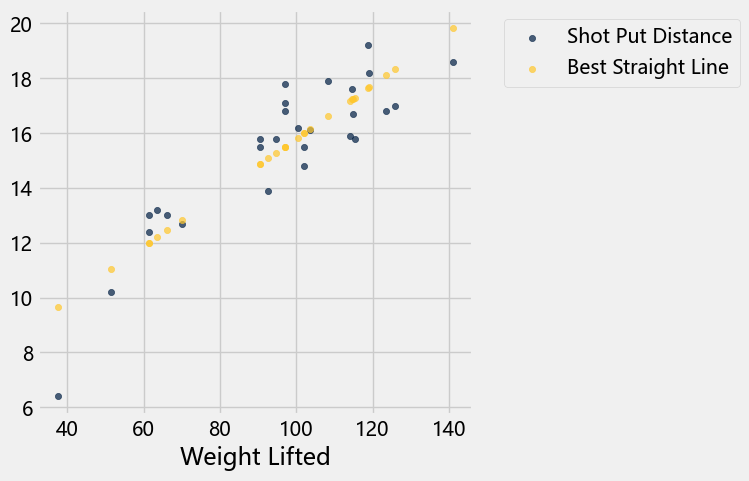

In [63]:
fitted = fit(shotput, 'Weight Lifted', 'Shot Put Distance')
shotput.with_column('Best Straight Line', fitted).scatter('Weight Lifted')

In [64]:
def shotput_quadratic_mse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    fitted = a*(x**2) + b*x + c
    return np.mean((y - fitted) ** 2)

In [65]:
best = minimize(shotput_quadratic_mse)
best

array([ -1.04004838e-03,   2.82708045e-01,  -1.53182115e+00])

In [66]:
(-0.00104)*(100**2) + 0.2827*100 - 1.5318

16.3382

In [67]:
x = shotput.column(0)
shotput_fit = best.item(0)*(x**2) + best.item(1)*x + best.item(2)

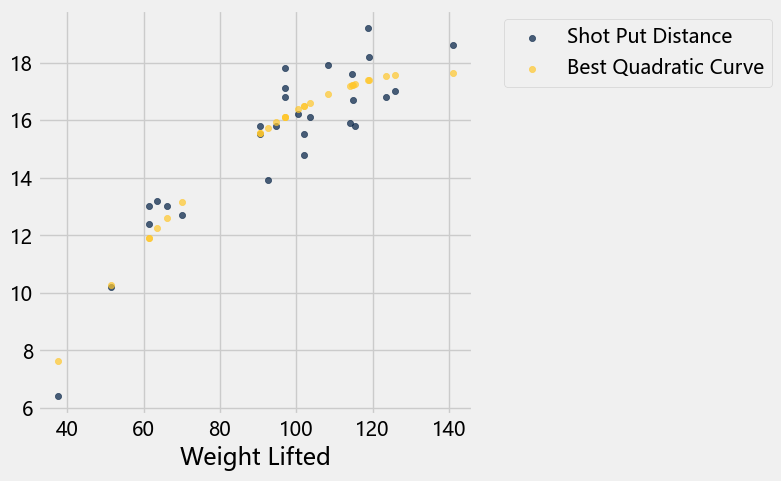

In [68]:
shotput.with_column('Best Quadratic Curve', shotput_fit).scatter(0)

### 6. Visual Diagnostics

In [69]:
from datascience import *
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import numpy as np
from scipy import stats

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [70]:
family_heights = Table.read_table(path_data + 'family_heights.csv')
heights = family_heights.select('midparentHeight', 'childHeight')
heights = heights.relabel(0, 'MidParent').relabel(1, 'Child')
hybrid = Table.read_table(path_data + 'hybrid.csv')

In [71]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

def correlation(table, x, y):
    x_in_standard_units = standard_units(table.column(x))
    y_in_standard_units = standard_units(table.column(y))
    return np.mean(x_in_standard_units * y_in_standard_units)

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) -  a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [72]:
def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

In [73]:
heights = heights.with_columns(
        'Fitted Value', fit(heights, 'MidParent', 'Child'),
        'Residual', residual(heights, 'MidParent', 'Child')
    )
heights

MidParent,Child,Fitted Value,Residual
75.43,73.2,70.7124,2.48763
75.43,69.2,70.7124,-1.51237
75.43,69,70.7124,-1.71237
75.43,69,70.7124,-1.71237
73.66,73.5,69.5842,3.91576
73.66,72.5,69.5842,2.91576
73.66,65.5,69.5842,-4.08424
73.66,65.5,69.5842,-4.08424
72.06,71,68.5645,2.43553
72.06,68,68.5645,-0.564467


In [74]:
def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

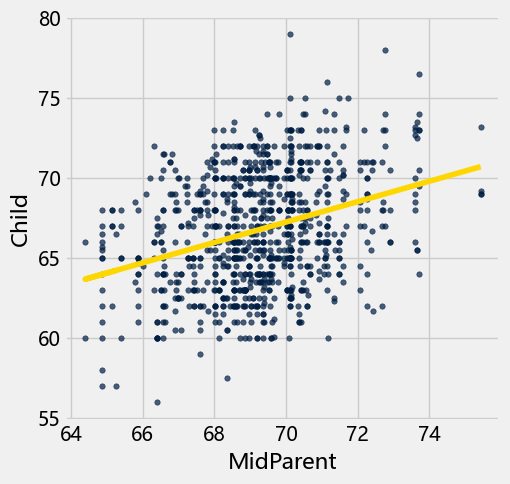

In [75]:
scatter_fit(heights, 'MidParent', 'Child')

In [76]:
def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')

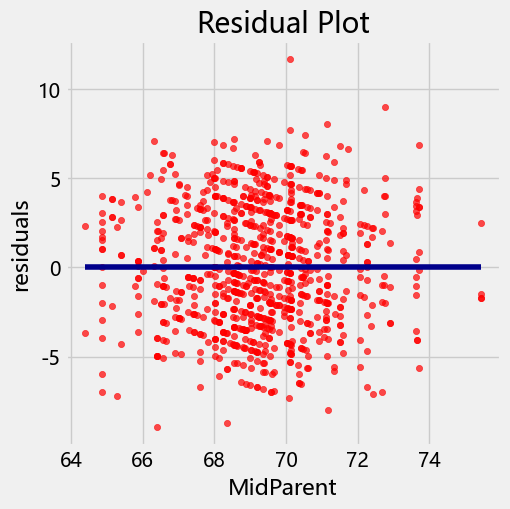

In [77]:
residual_plot(heights, 'MidParent', 'Child')

In [78]:
def regression_diagnostic_plots(table, x, y):
    scatter_fit(table, x, y)
    residual_plot(table, x, y)

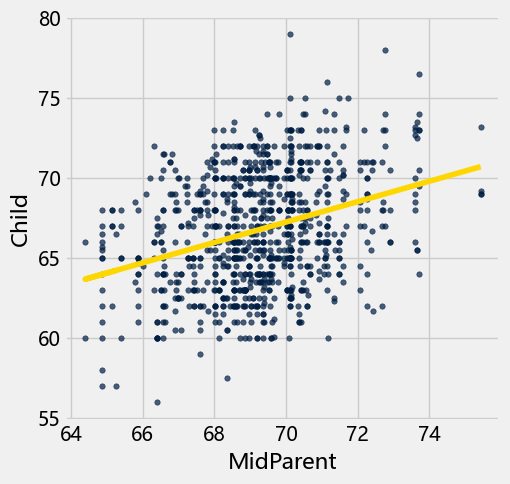

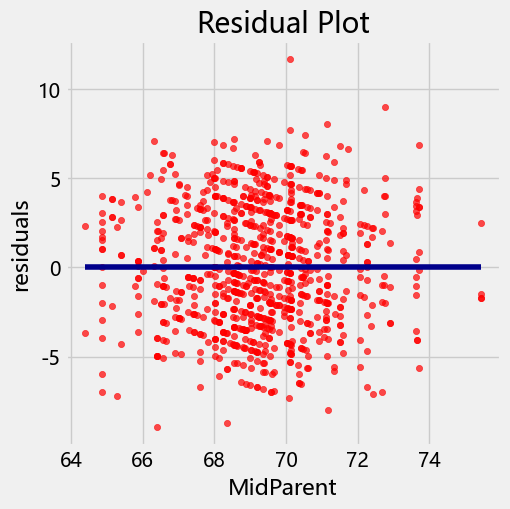

In [79]:
regression_diagnostic_plots(heights, 'MidParent', 'Child')

In [80]:
dugong = Table.read_table(path_data + 'dugongs.csv')
dugong = dugong.move_to_start('Length')
dugong

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5
2.27,4
2.15,5
2.26,5
2.35,7
2.47,8


In [81]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

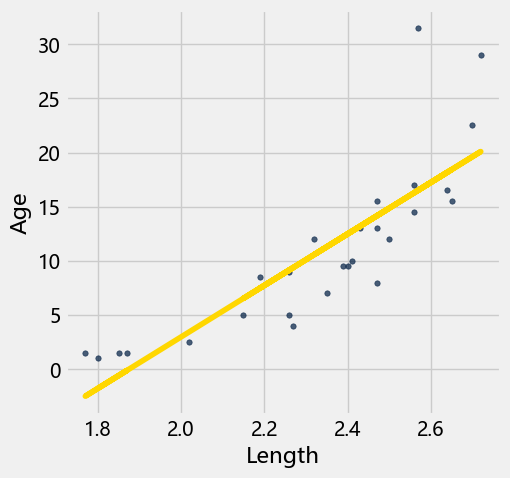

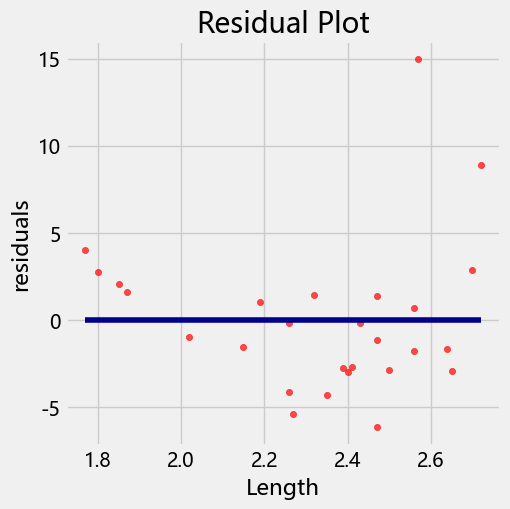

In [82]:
regression_diagnostic_plots(dugong, 'Length', 'Age')

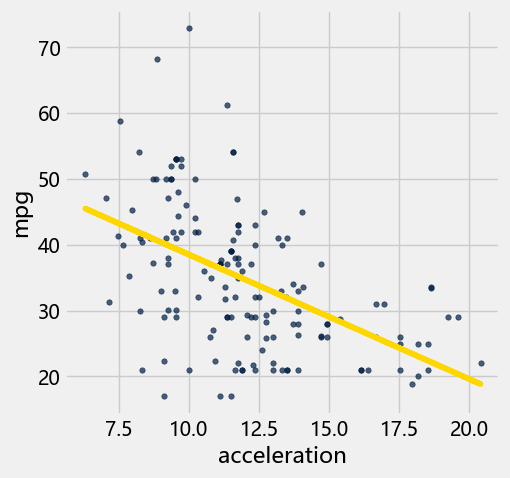

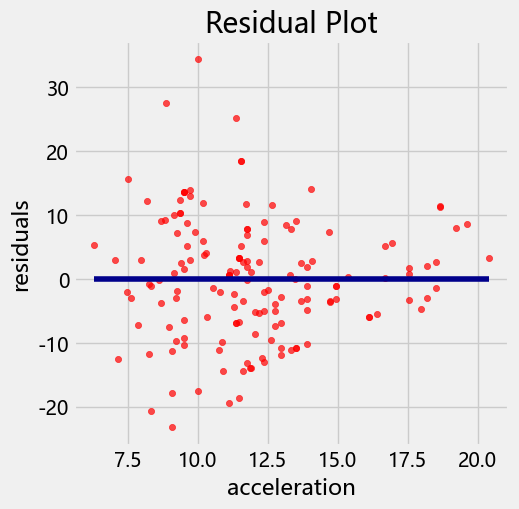

In [83]:
regression_diagnostic_plots(hybrid, 'acceleration', 'mpg')

### 7. Numerical Diagnostics

In [84]:
from datascience import *
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import numpy as np
from scipy import stats

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [85]:
family_heights = Table.read_table(path_data + 'family_heights.csv')
heights = family_heights.select('midparentHeight', 'childHeight')
heights = heights.relabel(0, 'MidParent').relabel(1, 'Child')
dugong = Table.read_table(path_data + 'dugongs.csv')
dugong = dugong.move_to_start('Length')
hybrid = Table.read_table(path_data + 'hybrid.csv')

In [86]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

def correlation(table, x, y):
    x_in_standard_units = standard_units(table.column(x))
    y_in_standard_units = standard_units(table.column(y))
    return np.mean(x_in_standard_units * y_in_standard_units)

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) -  a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)
    
def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')

def regression_diagnostic_plots(table, x, y):
    scatter_fit(table, x, y)
    residual_plot(table, x, y)   

In [87]:
heights = heights.with_columns(
        'Fitted Value', fit(heights, 'MidParent', 'Child'),
        'Residual', residual(heights, 'MidParent', 'Child')
    )

In [88]:
correlation(heights, 'MidParent', 'Residual')

-2.7196898076470642e-16

In [89]:
round(correlation(heights, 'MidParent', 'Residual'), 10)

-0.0

In [90]:
dugong = dugong.with_columns(
       'Fitted Value', fit(dugong, 'Length', 'Age'),
       'Residual', residual(dugong, 'Length', 'Age')
)
round(correlation(dugong, 'Length', 'Residual'), 10)

0.0

In [91]:
round(np.mean(heights.column('Residual')), 10)

0.0

In [92]:
round(np.mean(dugong.column('Residual')), 10)

0.0

In [93]:
np.std(heights.column('Residual'))

3.3880799163953426

In [94]:
r = correlation(heights, 'MidParent', 'Child')
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

3.3880799163953421

In [95]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

-0.5060703843771186

In [96]:
hybrid = hybrid.with_columns(
     'fitted mpg', fit(hybrid, 'acceleration', 'mpg'),
     'residual', residual(hybrid, 'acceleration', 'mpg')
)
np.std(hybrid.column('residual')), np.sqrt(1 - r**2)*np.std(hybrid.column('mpg'))

(9.4327368334302903, 9.4327368334302903)

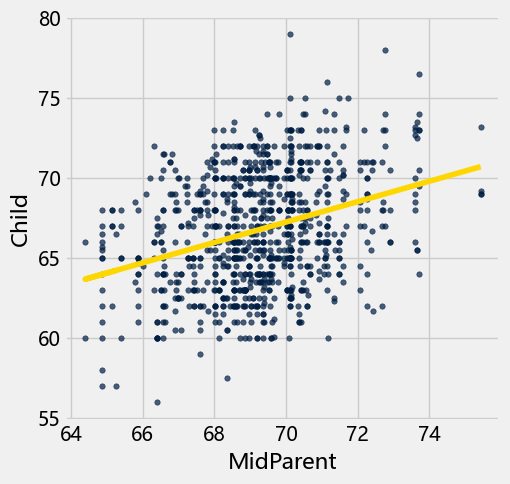

In [97]:
scatter_fit(heights, 'MidParent', 'Child')

In [98]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

In [99]:
np.std(heights.column('Fitted Value'))/np.std(heights.column('Child'))

0.32094989606395957

In [100]:
correlation(hybrid, 'acceleration', 'mpg')

-0.5060703843771186

In [101]:
np.std(hybrid.column('fitted mpg'))/np.std(hybrid.column('mpg'))

0.5060703843771186